# <center> <u> Hyper Tuning on Laptop price dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./laptop_price.csv', encoding='unicode_escape')

In [3]:
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
data.shape

(1303, 13)

In [6]:
data.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [7]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
data.drop(columns='laptop_ID', inplace=True)

## <u> Univariate Analysis

### Histplot

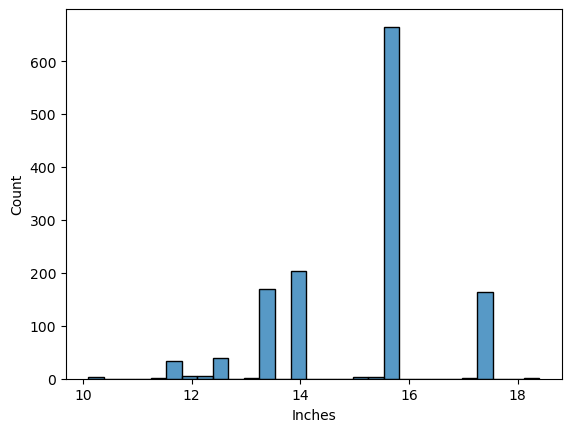

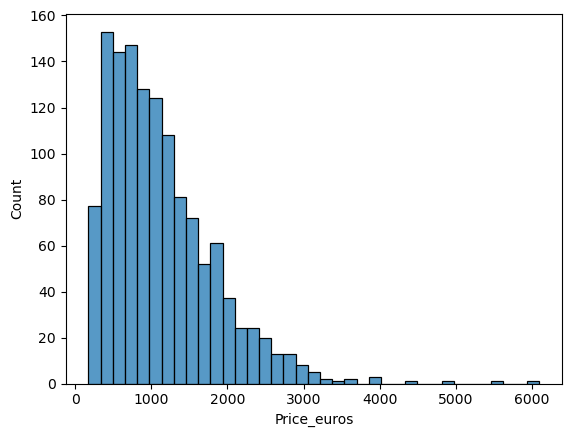

In [9]:
for i in data.columns:
    if data[i].dtypes !='object':
        sns.histplot(x=data[i])
        plt.show()

### KDE Plot

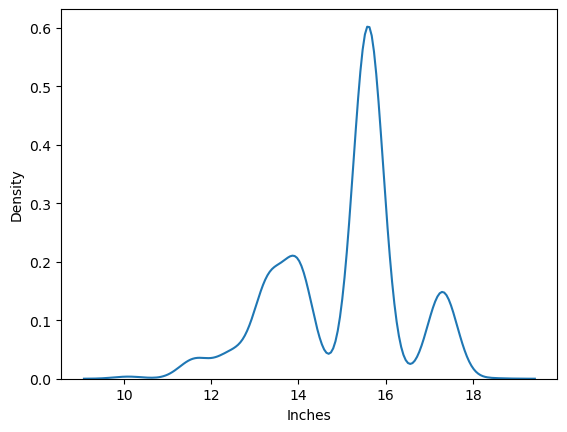

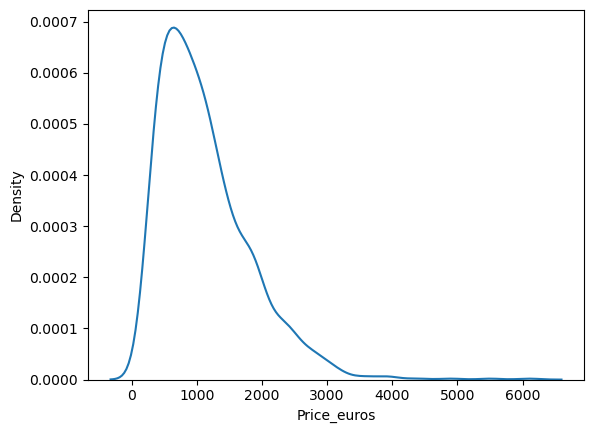

In [10]:
for i in data.columns:
    if data[i].dtypes !='object':
        sns.kdeplot(x=data[i])
        plt.show()

### Box plot

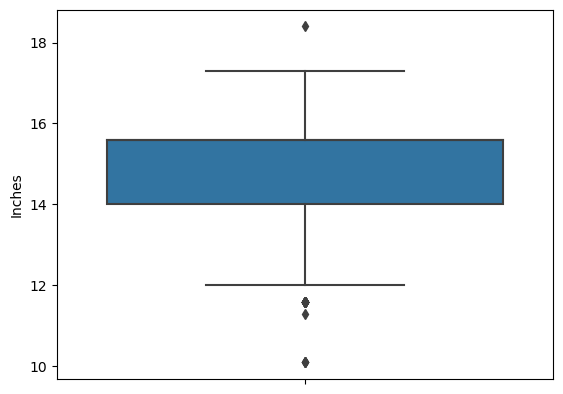

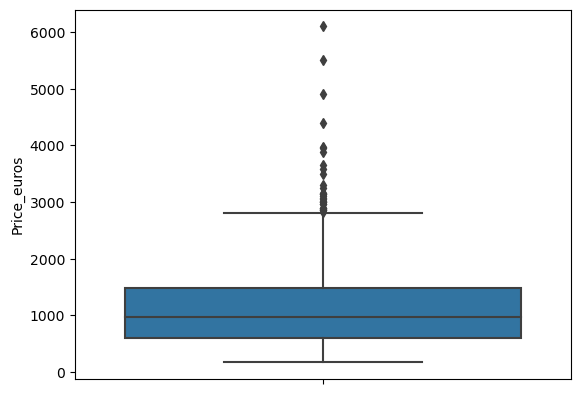

In [11]:
for i in data.columns:
    if data[i].dtypes !='object':
        sns.boxplot(y=data[i])
        plt.show()

### Outlier Treatment

In [12]:
columns =['Inches','Price_euros']

In [13]:
def oulier_limit(columns):
    Q3,Q1=np.nanpercentile(columns,[75,25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL,LL

In [14]:
for i in columns:
    UL,LL = oulier_limit(data[i])
    data[i] = np.where((data[i] > UL) | (data[i] < LL), np.nan,data[i])

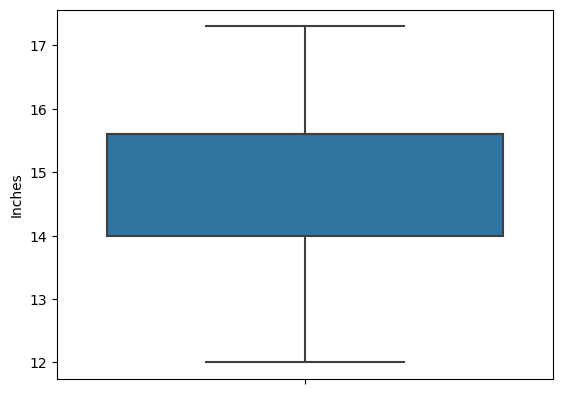

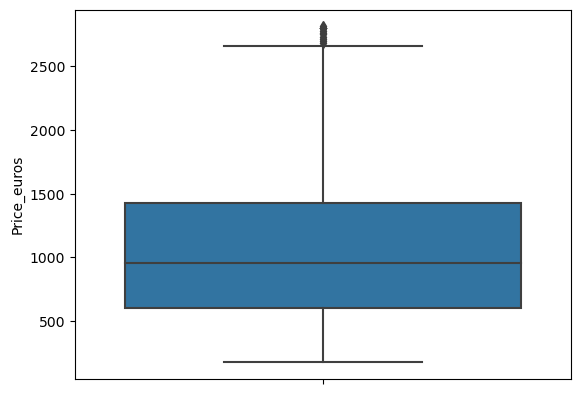

In [15]:
for i in columns:
    sns.boxplot(y=data[i])
    plt.show()

In [16]:
data.dropna(inplace=True)

### Label Encoding the Categorical columns

In [17]:
le = LabelEncoder()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1235 non-null   object 
 1   Product           1235 non-null   object 
 2   TypeName          1235 non-null   object 
 3   Inches            1235 non-null   float64
 4   ScreenResolution  1235 non-null   object 
 5   Cpu               1235 non-null   object 
 6   Ram               1235 non-null   object 
 7   Memory            1235 non-null   object 
 8   Gpu               1235 non-null   object 
 9   OpSys             1235 non-null   object 
 10  Weight            1235 non-null   object 
 11  Price_euros       1235 non-null   float64
dtypes: float64(2), object(10)
memory usage: 125.4+ KB


In [19]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [20]:
for i in data.columns:
    if data[i].dtypes =='object':
        data[i] = le.fit_transform(data[i])

### Checking correlation

In [21]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

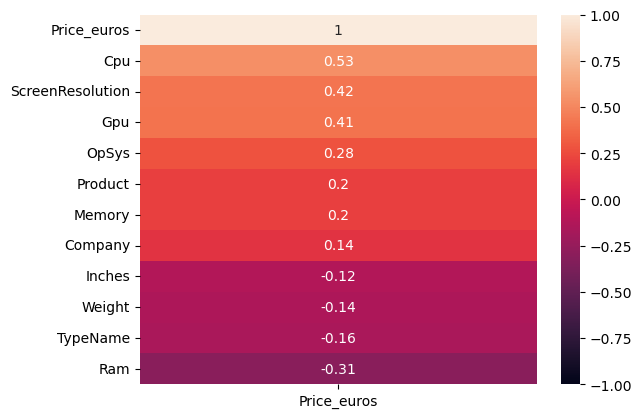

In [22]:
sns.heatmap(data.corr()[['Price_euros']].sort_values(by='Price_euros', ascending=False), vmin=-1, vmax=1, annot=True);

In [23]:
 x= data[['Cpu']].values

In [24]:
y=data[['Price_euros']].values

In [25]:
x

array([[61],
       [59],
       [70],
       ...,
       [33],
       [84],
       [33]])

### Feature Scaling

In [26]:
rs = RobustScaler()

In [27]:
rs.fit_transform(x)

array([[-0.48148148],
       [-0.55555556],
       [-0.14814815],
       ...,
       [-1.51851852],
       [ 0.37037037],
       [-1.51851852]])

### Model Building

In [28]:
models = { 
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()  
}

In [74]:
for name,model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error", cv=20, n_jobs=-1)
    print("Cross validation model: {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print("Average RMSE: ", rmse_avg)
    print("*"*100)

Cross validation model: LinearRegression
Average RMSE:  497.9192294001894
****************************************************************************************************
Cross validation model: Ridge
Average RMSE:  497.91922148733863
****************************************************************************************************
Cross validation model: LinearSVR
Average RMSE:  509.20873845044116
****************************************************************************************************
Cross validation model: DecisionTreeRegressor
Average RMSE:  398.61806219371874
****************************************************************************************************
Cross validation model: GradientBoostingRegressor
Average RMSE:  397.14459324061613
****************************************************************************************************
Cross validation model: AdaBoostRegressor
Average RMSE:  443.9696017834291
**************************************************

#### Here Random forest Regressor have the best performance, so proceed with it.

In [75]:
model = RandomForestRegressor()

In [77]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=25,shuffle=True)

In [78]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [79]:
y_pred = model.predict(x_test)

In [80]:
r2_score(y_test,y_pred)

0.5241818363833344

In [81]:
model.score(x_test,y_test)

0.5241818363833344

In [82]:
model.score(x_train,y_train)

0.6035256349338061

In [83]:
mean_absolute_error(y_test,y_pred)

274.41732288821896

In [84]:
mean_squared_error(y_test,y_pred)

141464.4981380754

In [85]:
np.sqrt(mean_squared_error(y_test,y_pred))

376.1176652831869

In [86]:
OUTPUT = pd.DataFrame(zip(y_test,y_pred), columns=["Actual","Predicted"],dtype=float)

In [87]:
OUTPUT.head()

,Actual,Predicted
0,1499.00,1969.999434
1,719.00,925.007491
2,2505.02,1630.681781
3,999.00,1090.925088
4,439.00,603.875652


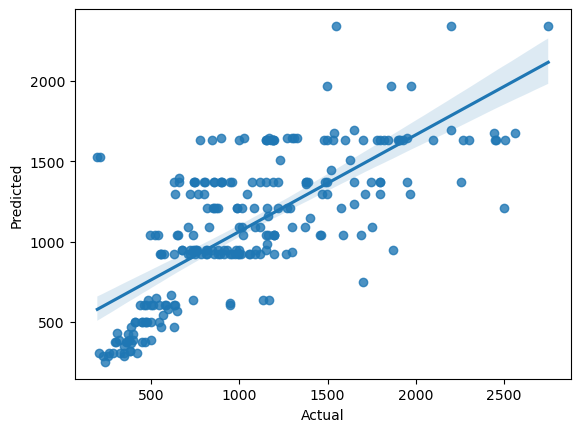

In [88]:
sns.regplot(data=OUTPUT, x="Actual" , y="Predicted");

In [89]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

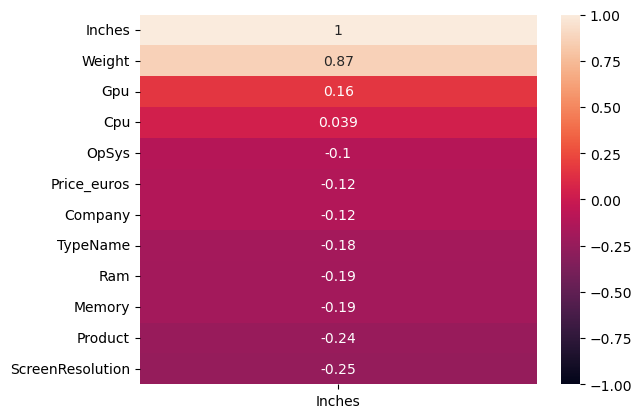

In [90]:
sns.heatmap(data.corr()[['Inches']].sort_values(by='Inches', ascending=False), vmin=-1, vmax=1, annot=True);

In [96]:
 x= data[['Weight']].values

In [97]:
y = data[['Inches']].values

In [98]:
rs.fit_transform(x)

array([[-0.93846154],
       [-0.98461538],
       [-0.4       ],
       ...,
       [-0.67692308],
       [ 0.06153846],
       [ 0.2       ]])

In [99]:
models = { 
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()  
}

In [100]:
for name,model in models.items():
    scores = cross_val_score(model, x1,y1, scoring="neg_mean_squared_error", cv=30, n_jobs=-1)
    print("Cross validation model: {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print("Average RMSE: ", rmse_avg)
    print("*"*100)

Cross validation model: LinearRegression
Average RMSE:  0.6343058031814729
****************************************************************************************************
Cross validation model: Ridge
Average RMSE:  0.634305809615015
****************************************************************************************************
Cross validation model: LinearSVR
Average RMSE:  0.9056116310493769
****************************************************************************************************
Cross validation model: DecisionTreeRegressor
Average RMSE:  0.48184270834379106
****************************************************************************************************
Cross validation model: GradientBoostingRegressor
Average RMSE:  0.4896639136298517
****************************************************************************************************
Cross validation model: AdaBoostRegressor
Average RMSE:  0.5655326587316737
************************************************

In [101]:
model = RandomForestRegressor()

In [102]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [103]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [104]:
y_pred = model.predict(x_test)

In [105]:
r2_score(y_test,y_pred)

0.857243492751925

In [106]:
model.score(x_test,y_test)

0.857243492751925

In [107]:
model.score(x_train,y_train)

0.9008972337295081

In [108]:
mean_absolute_error(y_test,y_pred)

0.2698196990182522

In [109]:
mean_squared_error(y_test,y_pred)

0.2456072251607922

In [110]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.49558775727492727

In [111]:
Output = pd.DataFrame(zip(y_test,y_pred), columns=["Actual","Predicted"],dtype=float)

In [112]:
Output.head()

,Actual,Predicted
0,15.6,15.433357
1,15.6,15.600000
2,15.6,15.599846
3,14.0,14.225598
4,15.6,15.494687


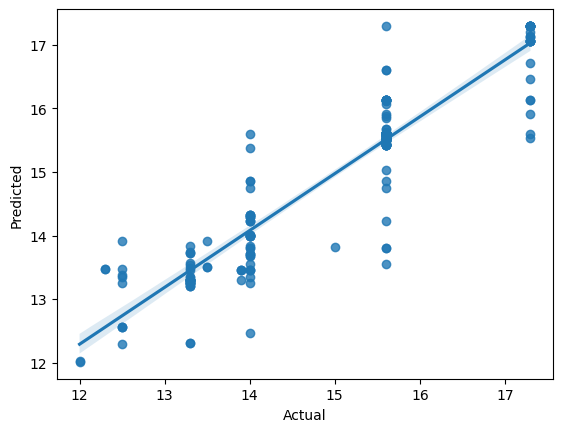

In [113]:
sns.regplot(data=Output, x="Actual" , y="Predicted");

In [114]:
best_model = GradientBoostingRegressor().fit(x_train,y_train)
y_pred = best_model.predict(x_test)
Score = r2_score(y_test,y_pred)
print("score before tuning hyper parameter tuning is : {}".format(Score))

score before tuning hyper parameter tuning is : 0.8501896824521327


In [115]:
GBR = GradientBoostingRegressor()

In [116]:
parameters = { 'learning_rate':[0.01,0.02,0.03,0.04],
                'n_estimators':[200,500,1000],
                'subsample':[0.9,0.5,0.2,0.1],
                'max_depth':[4,6,8]
}

In [117]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid=parameters, cv=2, n_jobs=-1,verbose=3)

In [118]:
grid_GBR.fit(x_train,y_train)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [200, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             verbose=3)

In [68]:
grid_GBR.best_params_

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.9}

In [119]:
grid_GBR_tuned = GradientBoostingRegressor(learning_rate =0.02, max_depth= 4, n_estimators= 200, subsample= 0.9)

In [120]:
grid_GBR_tuned.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=4, n_estimators=200,
                          subsample=0.9)

In [121]:
y_pred_gbr = grid_GBR_tuned.predict(x_test)

In [122]:
score = r2_score(y_test,y_pred_gbr)
mae = mean_absolute_error(y_test,y_pred_gbr)
mse = mean_squared_error(y_test,y_pred_gbr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbr))

In [123]:
print("r2 score: ",score)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)

r2 score:  0.8523140485927732
mae:  0.28752722123686025
mse:  0.2540881492521223
rmse:  0.5040715715571771


In [124]:
predict = grid_GBR_tuned.predict(x)

In [125]:
inches = data.Inches.values

In [126]:
PREDICT = pd.DataFrame(zip(inches,predict), columns=("ACTUAL","PREDICTED"))

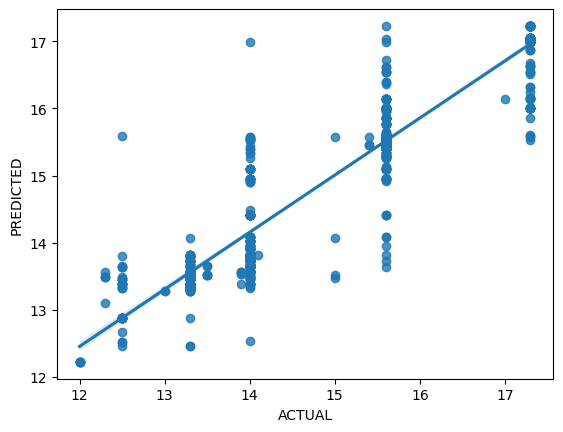

In [127]:
sns.regplot(data=PREDICT, x="ACTUAL", y="PREDICTED");